In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller

In [2]:
btc = pd.read_csv('BTCUSDT_Binance_futures_data_day.csv',skiprows=1)

In [3]:
btc_comp = btc.copy()

In [4]:
btc_comp.date = pd.to_datetime(btc_comp.date)

In [5]:
btc_comp.set_index('date',inplace= True)

In [6]:
btc_comp = btc_comp.asfreq('d')

In [9]:
btc_comp

,unix,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
date,,,,,,,,,
2019-09-08,1567900800000,BTC/USDT,10000.00,10412.65,10000.00,10391.63,3096.291,3.209628e+07,3754
2019-09-09,1567987200000,BTC/USDT,10316.62,10475.54,10077.22,10307.00,14824.373,1.524472e+08,11296
2019-09-10,1568073600000,BTC/USDT,10307.00,10382.97,9940.87,10102.02,9068.955,9.271765e+07,10089
2019-09-11,1568160000000,BTC/USDT,10094.27,10293.11,9884.31,10159.55,10897.922,1.097862e+08,13811
2019-09-12,1568246400000,BTC/USDT,10163.06,10450.13,10042.12,10415.13,15609.634,1.594942e+08,20060
...,...,...,...,...,...,...,...,...,...
2022-09-11,1662854400000,BTC/USDT,21639.50,21883.40,21336.00,21820.30,420979.326,9.093590e+09,2862590
2022-09-12,1662940800000,BTC/USDT,21820.30,22474.00,21540.00,22386.00,818601.932,1.810046e+10,5450349
2022-09-13,1663027200000,BTC/USDT,22386.00,22850.00,19840.00,20162.50,1218769.927,2.605512e+10,7515217


In [7]:
def difference(dataset,interval=1):
    diff=list()
    for i in range(interval,len(dataset)):
        value=dataset[i]-dataset[i-interval]
        diff.append(value)
    return diff

In [13]:
close_diff=difference(btc_comp.close)
open_diff=difference(btc_comp.open)
high_diff=difference(btc_comp.high)
low_diff=difference(btc_comp.low)
tradecount_diff=difference(btc_comp.tradecount)
unix_diff=difference(btc_comp.unix)

In [15]:
btc_comp=btc_comp.iloc[1:,:]

In [16]:
btc_comp['close_diff']=close_diff
btc_comp['open_diff']=open_diff
btc_comp['high_diff']=high_diff
btc_comp['low_diff']=low_diff
btc_comp['tradecount_diff']=tradecount_diff
btc_comp['unix_diff']=unix_diff

C:\Users\lenovo\AppData\Local\Temp/ipykernel_12304/2117552401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_comp['close_diff']=close_diff
C:\Users\lenovo\AppData\Local\Temp/ipykernel_12304/2117552401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_comp['open_diff']=open_diff
C:\Users\lenovo\AppData\Local\Temp/ipykernel_12304/2117552401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [17]:
btc_comp

,unix,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,close_diff,open_diff,high_diff,low_diff,tradecount_diff,unix_diff
date,,,,,,,,,,,,,,,
2019-09-09,1567987200000,BTC/USDT,10316.62,10475.54,10077.22,10307.00,14824.373,1.524472e+08,11296,-84.63,316.62,62.89,77.22,7542,86400000
2019-09-10,1568073600000,BTC/USDT,10307.00,10382.97,9940.87,10102.02,9068.955,9.271765e+07,10089,-204.98,-9.62,-92.57,-136.35,-1207,86400000
2019-09-11,1568160000000,BTC/USDT,10094.27,10293.11,9884.31,10159.55,10897.922,1.097862e+08,13811,57.53,-212.73,-89.86,-56.56,3722,86400000
2019-09-12,1568246400000,BTC/USDT,10163.06,10450.13,10042.12,10415.13,15609.634,1.594942e+08,20060,255.58,68.79,157.02,157.81,6249,86400000
2019-09-13,1568332800000,BTC/USDT,10414.96,10440.55,10153.51,10341.34,19252.721,1.982054e+08,29249,-73.79,251.90,-9.58,111.39,9189,86400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,1662854400000,BTC/USDT,21639.50,21883.40,21336.00,21820.30,420979.326,9.093590e+09,2862590,180.80,287.50,58.40,223.80,-435239,86400000
2022-09-12,1662940800000,BTC/USDT,21820.30,22474.00,21540.00,22386.00,818601.932,1.810046e+10,5450349,565.70,180.80,590.60,204.00,2587759,86400000
2022-09-13,1663027200000,BTC/USDT,22386.00,22850.00,19840.00,20162.50,1218769.927,2.605512e+10,7515217,-2223.50,565.70,376.00,-1700.00,2064868,86400000


In [18]:
size=int(len(btc_comp)*0.8)
btc_train=btc_comp.iloc[:size]
btc_test=btc_comp.iloc[size:]

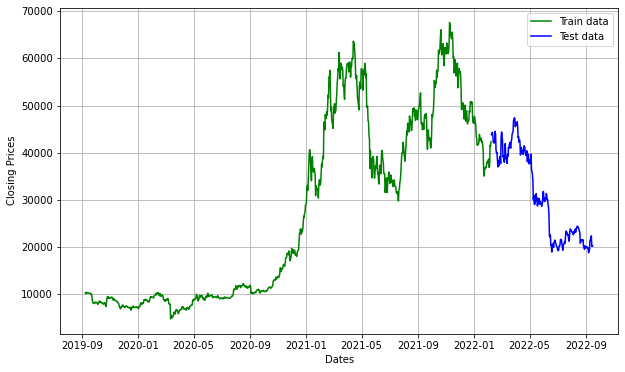

In [19]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(btc_train.close, 'green', label='Train data')
plt.plot(btc_test.close, 'blue', label='Test data')
plt.legend()

In [20]:
model_AR=ARIMA(endog=btc_train.close_diff,order=(1,0,3))
result_AR=model_AR.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [21]:
btc_test

,unix,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,close_diff,open_diff,high_diff,low_diff,tradecount_diff,unix_diff
date,,,,,,,,,,,,,,,
2022-02-07,1644192000000,BTC/USDT,42361.34,44541.16,41609.76,43829.99,418053.774,1.806674e+10,4078430,1468.64,986.66,1884.36,509.76,1881315,86400000
2022-02-08,1644278400000,BTC/USDT,43829.99,45600.00,42641.00,44021.57,468015.421,2.051041e+10,4649391,191.58,1468.65,1058.84,1031.24,570961,86400000
2022-02-09,1644364800000,BTC/USDT,44021.58,44826.00,43089.08,44358.08,300270.062,1.318256e+10,3214990,336.51,191.59,-774.00,448.08,-1434401,86400000
2022-02-10,1644451200000,BTC/USDT,44358.09,45847.50,43136.96,43471.29,563922.075,2.505691e+10,5369837,-886.79,336.51,1021.50,47.88,2154847,86400000
2022-02-11,1644537600000,BTC/USDT,43471.30,43900.00,41914.23,42366.00,414646.193,1.785997e+10,4498402,-1105.29,-886.79,-1947.50,-1222.73,-871435,86400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,1662854400000,BTC/USDT,21639.50,21883.40,21336.00,21820.30,420979.326,9.093590e+09,2862590,180.80,287.50,58.40,223.80,-435239,86400000
2022-09-12,1662940800000,BTC/USDT,21820.30,22474.00,21540.00,22386.00,818601.932,1.810046e+10,5450349,565.70,180.80,590.60,204.00,2587759,86400000
2022-09-13,1663027200000,BTC/USDT,22386.00,22850.00,19840.00,20162.50,1218769.927,2.605512e+10,7515217,-2223.50,565.70,376.00,-1700.00,2064868,86400000


In [22]:
start='2022-02-07'
end='2022-09-15'

In [23]:
btc_pred=result_AR.predict(start=start,end=end)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='date'>

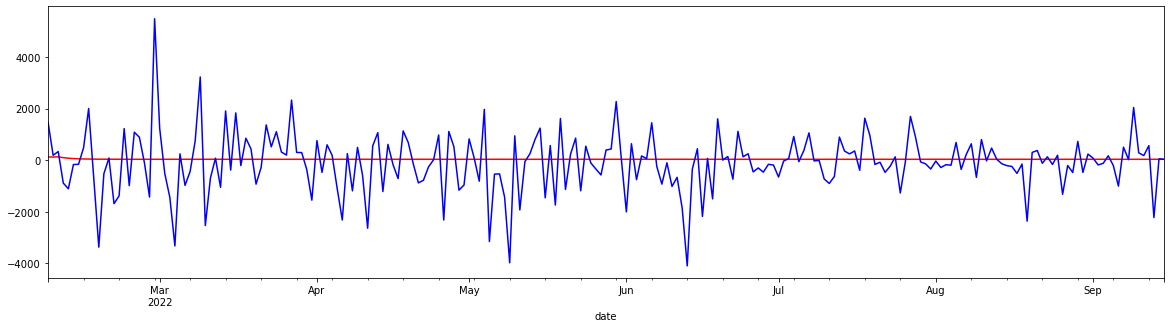

In [24]:
btc_pred.plot(figsize=(20,5),c='r')
btc_test.close_diff[start:end].plot(figsize=(20,5),c='b')

In [25]:
def inverse_difference(btc_test, btc_pred, interval=1):
    return btc_pred + btc_test[-interval]

In [26]:
btc_pred_inv=inverse_difference(btc_test.close[start:end],btc_pred)

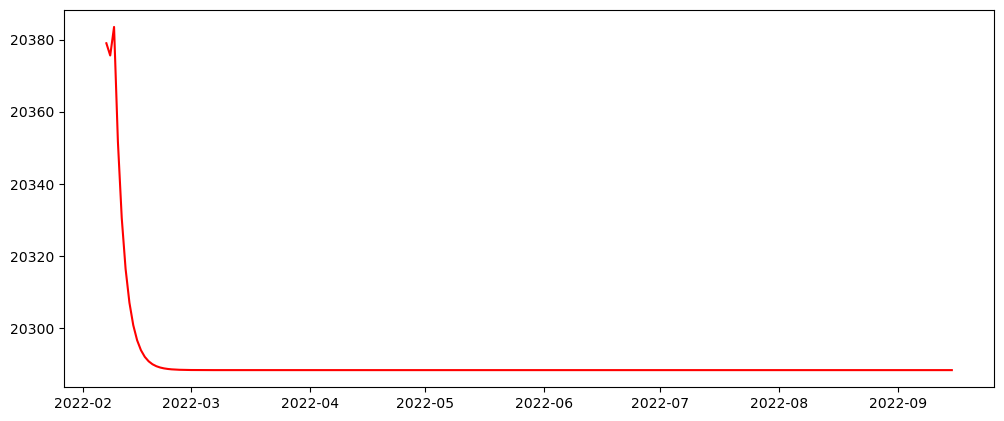

In [27]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(btc_pred_inv,c='r')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<AxesSubplot:xlabel='date'>

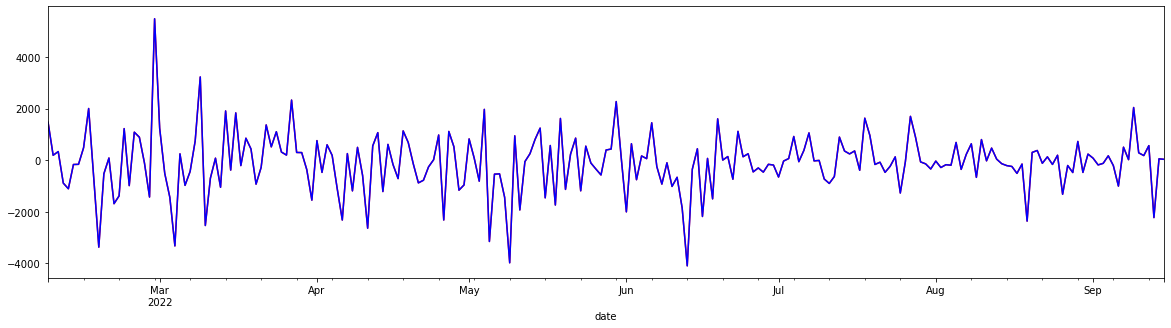

In [28]:
model_max=ARIMA(endog=btc_train.close_diff,order=(1,0,3),exog=btc_train[['close_diff']])
result_max=model_max.fit()
start='2022-02-07'
end='2022-09-15'
btc_pred_max=result_max.predict(start=start,end=end,exog=btc_test[['close_diff']])
btc_pred_max.plot(figsize=(20,5),c='r')
btc_test.close_diff[start:end].plot(figsize=(20,5),c='b')

In [29]:
history = [x for x in btc_train.close]
predictedARIMA= list()
for t in range(len(btc_test.close[start:end])): 
    model_AR = ARIMA(history, order=(1,1,3))
    result_AR = model_AR.fit()
    output = result_AR.forecast()
    yhat = output[0]
    predictedARIMA.append(yhat)
    obs = btc_test.close[t]
    history.append(obs)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [30]:
predictedARIMA=pd.DataFrame(predictedARIMA,index=btc_test[start:end].index)

In [31]:
predictedARIMA

,0
date,
2022-02-07,42489.043781
2022-02-08,43903.578482
2022-02-09,44150.559593
2022-02-10,44503.589183
2022-02-11,43629.254541
...,...
2022-09-11,21636.410362
2022-09-12,21896.430086
2022-09-13,22433.695472


<AxesSubplot:xlabel='date'>

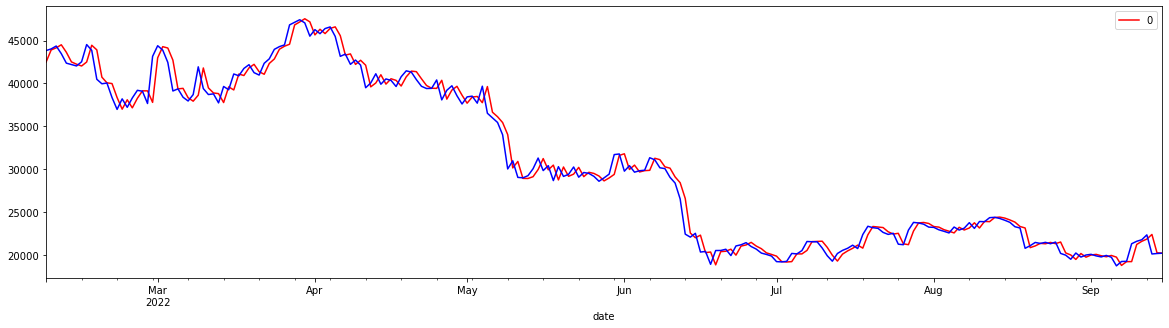

In [32]:
predictedARIMA.plot(figsize=(20,5),c='r')
btc_test.close[start:end].plot(figsize=(20,5),c='b')

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [34]:
from math import sqrt

In [35]:
def root_mean_squared_error(y_true, y_pred): 
    mse=mean_squared_error(y_true,y_pred)
    rmse=sqrt(mse)

    return rmse

In [36]:
def validation_metrics(y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    rmse=root_mean_squared_error(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)

    return print('r2= '+str(r2),' mse= '+str(mse),' rmse= '+str(rmse),' mae= '+str(mae))

In [37]:
validation_metrics(btc_test.close[start:end],predictedARIMA)

r2= 0.9846142599329871  mse= 1321259.6643878727  rmse= 1149.4605971445358  mae= 802.6700255564832


In [38]:
start='2022-02-07'
end='2022-09-15'

In [39]:
for t in range(len(btc_test.close[start:end])): 
    exog=btc_test['close'][t]

In [43]:
history = [x for x in btc_train.close]
predictedARIMAX= list()
exog=[x for x in btc_train.open]
for t in range(len(btc_test.close[start:end])): 
    model_ARIMAX=ARIMA(history,order=(1,1,3),exog=exog)
    result_ARIMAX=model_ARIMAX.fit() 
    output = result_ARIMAX.forecast(exog=btc_test['open'][t].reshape(1,1))
    yhat = output[0]
    predictedARIMAX.append(yhat)
    obs = btc_test.close[t]
    exog_obs=btc_test.open[t]
    history.append(obs)
    exog.append(exog_obs)

In [44]:
predictedARIMAX=pd.DataFrame(predictedARIMAX,index=btc_test[start:end].index)

In [45]:
predictedARIMAX

,0
date,
2022-02-07,42454.350354
2022-02-08,43869.239373
2022-02-09,44117.958364
2022-02-10,44470.466103
2022-02-11,43595.710066
...,...
2022-09-11,21653.013920
2022-09-12,21916.860705
2022-09-13,22450.010061


<AxesSubplot:xlabel='date'>

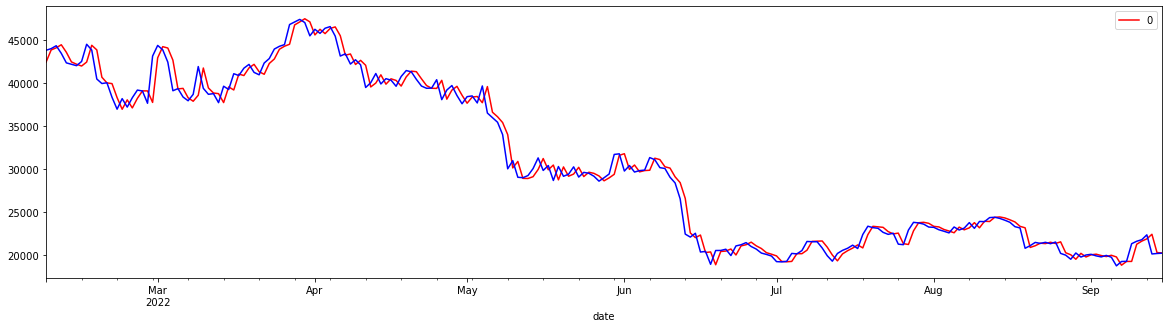

In [46]:
predictedARIMAX.plot(figsize=(20,5),c='r')
btc_test.close[start:end].plot(figsize=(20,5),c='b')

In [47]:
validation_metrics(btc_test.close[start:end],predictedARIMAX)

r2= 0.9846709666801867  mse= 1316389.9384307773  rmse= 1147.3403760134902  mae= 802.2356654030384
